<a href="https://colab.research.google.com/github/Ibrahim-AbuShara/EDA-practice-For-ML1/blob/main/spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship Titanic
* Predict which passengers are transported to an alternate dimension

## Setup the Dependencies for Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 113MB/s]


In [ ]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Import important libs

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Uniqueness Check

In [ ]:
len(df.PassengerId.unique())

8693

## HomePlanet  analysis  
##### The planet the passenger departed from, typically their planet of permanent residence.
- 201 Messing values
- 3 cats

In [ ]:
df.HomePlanet

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

### Messing values

In [ ]:
df.HomePlanet.isna().sum()

201

In [ ]:
df.HomePlanet.isna().sum()/len(df)*100

2.312205222592891

### var descrption

In [ ]:
df.HomePlanet.describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [ ]:
df.HomePlanet.mode()

0    Earth
Name: HomePlanet, dtype: object

<Axes: title={'center': 'dist'}, xlabel='HomePlanet', ylabel='count'>

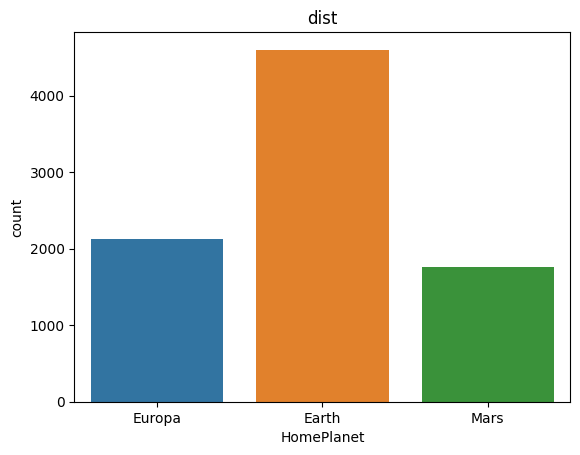

In [ ]:
plt.title("dist")
sns.countplot(x=df.HomePlanet,data=df)

## CryoSleep analysis
#### Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Binary
* 217 missng values





In [ ]:
df.CryoSleep

0       False
1       False
2       False
3       False
4       False
        ...  
8688    False
8689     True
8690    False
8691    False
8692    False
Name: CryoSleep, Length: 8693, dtype: object

### Messing values check

In [ ]:
df.CryoSleep.isna().sum()


217

In [ ]:
df.CryoSleep.isna().sum()/len(df)*100


2.4962613597147127

### var discerption

In [ ]:
df.CryoSleep.describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

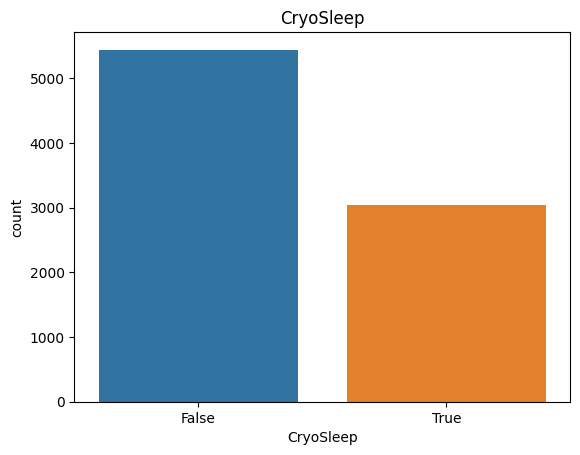

In [ ]:
plt.title("CryoSleep")
sns.countplot(x=df.CryoSleep,data=df)
plt.show()

## Preprocessing

In [ ]:
def preprocessing(df):
  # Fill missing values in homeplanet with missing
  df['HomePlanet'].fillna('Missing', inplace=True)
  # Cryosleep - highly correlated - drop na rows
  df['CryoSleep'].fillna(df['CryoSleep'].mode(), inplace=True)

In [1]:
!git remote add origin https://github.com/Ibrahim-AbuShara/EDA-practice-For-ML1.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
